In [1]:
import pandas as pd
import numpy as np

# Load the dataset

df = pd.read_csv('data/raw/pharma_spending_data.csv')

In [2]:
# Step 1: Data Cleaning
# Drop rows where LOCATION or TIME are missing, as they are essential
df.dropna(subset=['LOCATION', 'TIME'], inplace=True)

# Fill missing values in other columns with appropriate strategies
# For PC_HEALTHXP, PC_GDP, USD_CAP, and TOTAL_SPEND, we use mean imputation as an example
df.dropna(subset=['LOCATION', 'TIME'], inplace=True)
df['PC_HEALTHXP'].fillna(df['PC_HEALTHXP'].mean(), inplace=True)
df['PC_GDP'].fillna(df['PC_GDP'].mean(), inplace=True)
df['USD_CAP'].fillna(df['USD_CAP'].mean(), inplace=True)
df['TOTAL_SPEND'].fillna(df['TOTAL_SPEND'].mean(), inplace=True)
df['FLAG_CODES'].fillna('Unknown', inplace=True)

# Fill FLAG_CODES missing values with 'Unknown' to denote unreliability in these cases
df['FLAG_CODES'].fillna('Unknown', inplace=True)

# Step 2: Categorization based on TOTAL_SPEND
# Calculate the spend thresholds for categorization
top_threshold = df['TOTAL_SPEND'].quantile(0.75)
bottom_threshold = df['TOTAL_SPEND'].quantile(0.25)

# Define categories for top, mid, and bottom spenders
def categorize_spender(spend):
    if spend >= top_threshold:
        return 'Top'
    elif spend <= bottom_threshold:
        return 'Bottom'
    else:
        return 'Mid'

# Apply categorization
df['Spender_Category'] = df['TOTAL_SPEND'].apply(categorize_spender)

# Step 3: Analysis of Categories
# Calculate basic statistics for each category
category_summary = df.groupby('Spender_Category')[['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].mean()

# Display the count of countries in each category
category_counts = df['Spender_Category'].value_counts()

# Display results
print("Category Summary Statistics:\n", category_summary)
print("\nCategory Counts:\n", category_counts)

# Optional: Save cleaned and categorized data to a new file
df.to_csv('cleaned_and_categorized_pharma_spending.csv', index=False)

Category Summary Statistics:
                    TOTAL_SPEND  PC_HEALTHXP    PC_GDP     USD_CAP
Spender_Category                                                 
Bottom              323.133436    13.863656  0.813413  159.119089
Mid                2917.068340    16.366351  1.170923  288.288890
Top               40904.422355    19.028869  1.528533  444.491089

Category Counts:
 Spender_Category
Mid       518
Bottom    259
Top       259
Name: count, dtype: int64


C:\Users\khali\AppData\Local\Temp\ipykernel_8224\3507095884.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PC_HEALTHXP'].fillna(df['PC_HEALTHXP'].mean(), inplace=True)
C:\Users\khali\AppData\Local\Temp\ipykernel_8224\3507095884.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [3]:
# Step 2: Aggregate TOTAL_SPEND by country
country_spend = df.groupby('LOCATION')['TOTAL_SPEND'].sum().reset_index()

# Step 3: Sort by TOTAL_SPEND in descending order
country_spend_sorted = country_spend.sort_values(by='TOTAL_SPEND', ascending=False)

# Step 4: Categorize into Top 10, Middle 10, and Bottom 10 based on TOTAL_SPEND
top_10_countries = country_spend_sorted.head(10)
bottom_10_countries = country_spend_sorted.tail(10)
middle_10_start = len(country_spend_sorted) // 2 - 5  # Determine the middle segment start
middle_10_countries = country_spend_sorted.iloc[middle_10_start:middle_10_start + 10]

# Add a new column to label each category
country_spend_sorted['Spender_Category'] = 'Other'
country_spend_sorted.loc[top_10_countries.index, 'Spender_Category'] = 'Top 10 Spenders'
country_spend_sorted.loc[middle_10_countries.index, 'Spender_Category'] = 'Middle 10 Spenders'
country_spend_sorted.loc[bottom_10_countries.index, 'Spender_Category'] = 'Bottom 10 Spenders'

# Optional: Save the categorized dataset
country_spend_sorted.to_csv('categorized_pharma_spending_by_country.csv', index=False)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the categorized dataset if already saved, or use the sorted DataFrame from the previous steps
# country_spend_sorted = pd.read_csv('categorized_pharma_spending_by_country.csv')

# Extract each category
top_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Top 10 Spenders']
middle_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Middle 10 Spenders']
bottom_10_countries = country_spend_sorted[country_spend_sorted['Spender_Category'] == 'Bottom 10 Spenders']

# Function to plot a category
def plot_category(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['LOCATION'], data['TOTAL_SPEND'], color='skyblue')
    plt.title(f'{title} by TOTAL_SPEND')
    plt.xlabel('Country')
    plt.ylabel('Total Spend (Millions USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [5]:
# Step 5: Display or Save the Results
# Display each category with country names and total spend
print("Top 10 Countries by TOTAL_SPEND:\n", top_10_countries[['LOCATION', 'TOTAL_SPEND']])

Top 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
35      USA   4186292.78
19      JPN   1602492.93
6       DEU   1188168.49
11      FRA    802298.94
18      ITA    754377.19
24      MEX    451903.24
3       CAN    445157.79
8       ESP    436073.35
20      KOR    413876.98
12      GBR    243390.12


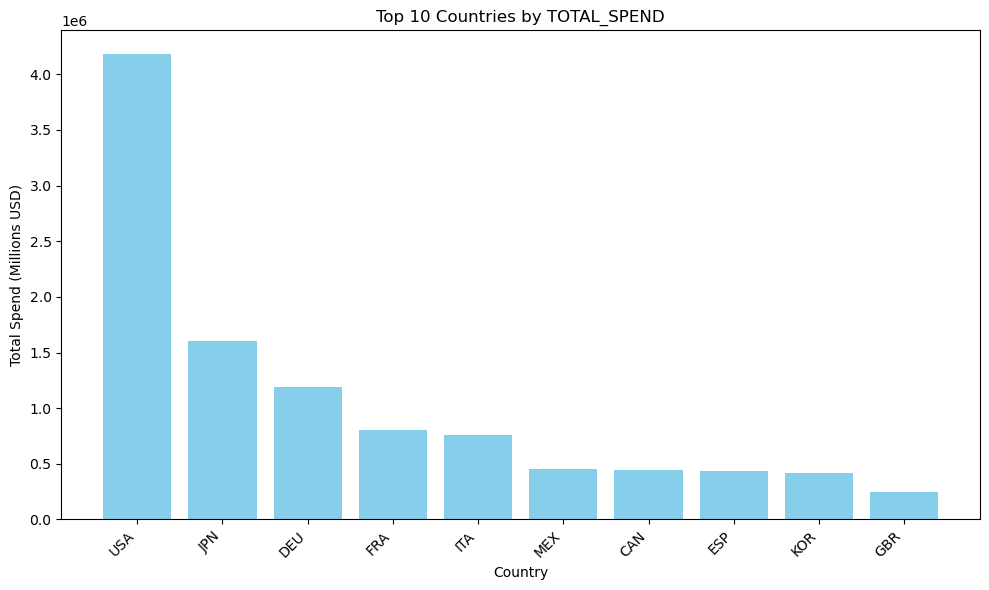

In [6]:
# Plot each category
plot_category(top_10_countries, "Top 10 Countries")

In [7]:
# Display each category with country names and total spend
print("\nMiddle 10 Countries by TOTAL_SPEND:\n", middle_10_countries[['LOCATION', 'TOTAL_SPEND']])


Middle 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
2       BEL    126330.37
13      GRC    113206.42
29      PRT    106881.27
4       CHE    103005.12
33      SWE     93430.58
1       AUT     82723.22
14      HUN     81580.59
5       CZE     78489.23
10      FIN     52228.15
15      IRL     46876.19


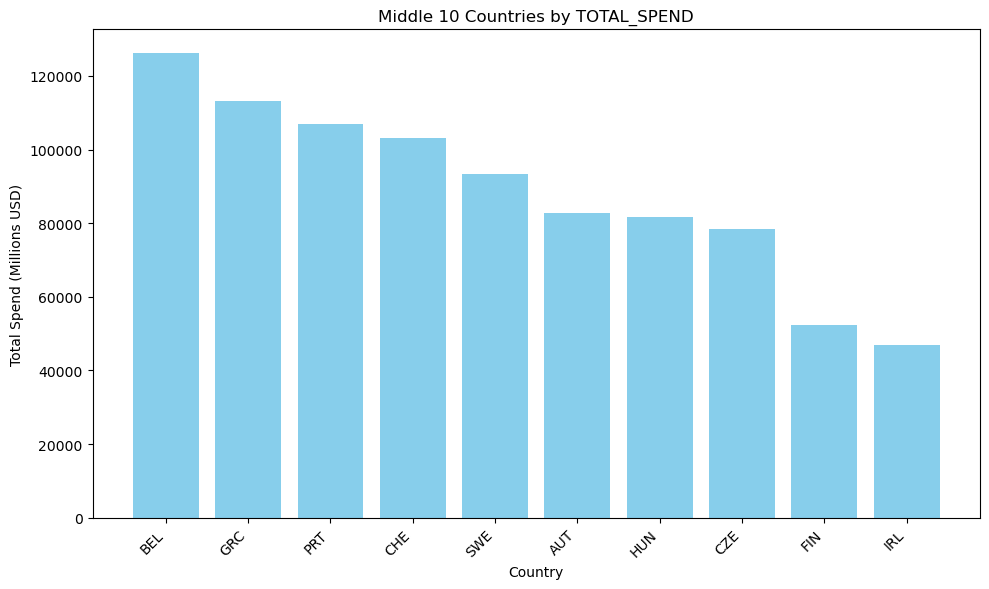

In [8]:
# Plot each category
plot_category(middle_10_countries, "Middle 10 Countries")

In [11]:
# Display each category with country names and total spend
print("\nBottom 10 Countries by TOTAL_SPEND:\n", bottom_10_countries[['LOCATION', 'TOTAL_SPEND']])


Bottom 10 Countries by TOTAL_SPEND:
    LOCATION  TOTAL_SPEND
31      SVK     38472.30
34      TUR     25138.33
17      ISR     16654.40
21      LTU     13859.94
32      SVN     12694.20
27      NZL     11907.15
23      LVA      6829.89
9       EST      5179.24
22      LUX      4858.94
16      ISL      3752.89


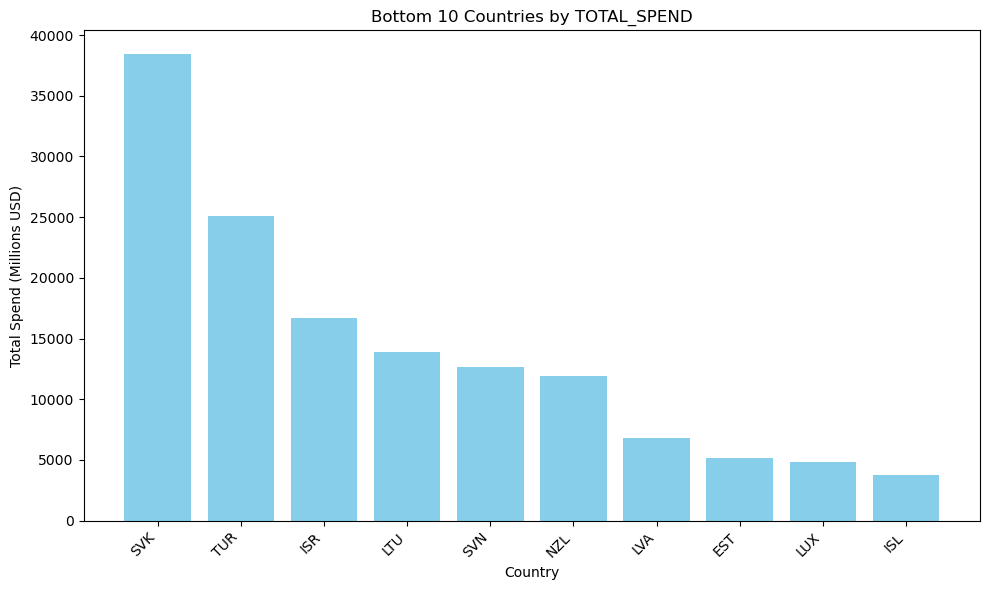

In [10]:
# Plot each category
plot_category(bottom_10_countries, "Bottom 10 Countries")

In this case, where you’re analyzing and comparing spending among countries, purposive sampling or judgmental sampling has been used. Here’s why and how it applies:

Purposive Sampling:

Definition: This method involves selecting specific subgroups of interest based on certain criteria rather than random selection.
Application: You are selecting the top 10, middle 10, and bottom 10 countries by TOTAL_SPEND, which is a targeted, non-random sample designed to provide insights into high, moderate, and low spenders. This enables focused comparisons and analysis within defined spending brackets.
Alternative Sampling Approaches (if required for more general analysis):

Stratified Sampling: You could stratify the dataset into spending levels (e.g., high, medium, low based on quantiles or other ranges) and then select random samples within each stratum. This would give a more randomized but still representative view within each spending level.
Systematic Sampling: This could be applied if you wanted a representative sample spread out across the entire dataset by choosing every nth country after sorting by TOTAL_SPEND, providing an evenly spaced sample of countries across spending levels.
In your case, purposive sampling is most effective since you are interested in directly analyzing and comparing specific groups based on spending levels.